 # MPA-MLF, Lab 7 - Convolutional Neural Network

In [2]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

0. Import libraries

In [6]:
from tensorflow import keras
from keras.models import Sequential
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from keras.datasets import cifar10
import zipfile
import os
import pandas as pd
from PIL import Image
from keras.utils import image_dataset_from_directory
from keras.utils import to_categorical
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from keras.optimizers import Adamax
from keras.callbacks import EarlyStopping

from keras.datasets import cifar10
from keras.utils import to_categorical
from keras.callbacks import EarlyStopping
from keras.regularizers import l1, l2



from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
import seaborn as sns
from keras.preprocessing.image import img_to_array, load_img

###################################
font = {'weight' : 'bold',
        'size'   : 12}

matplotlib.rc('font', **font)

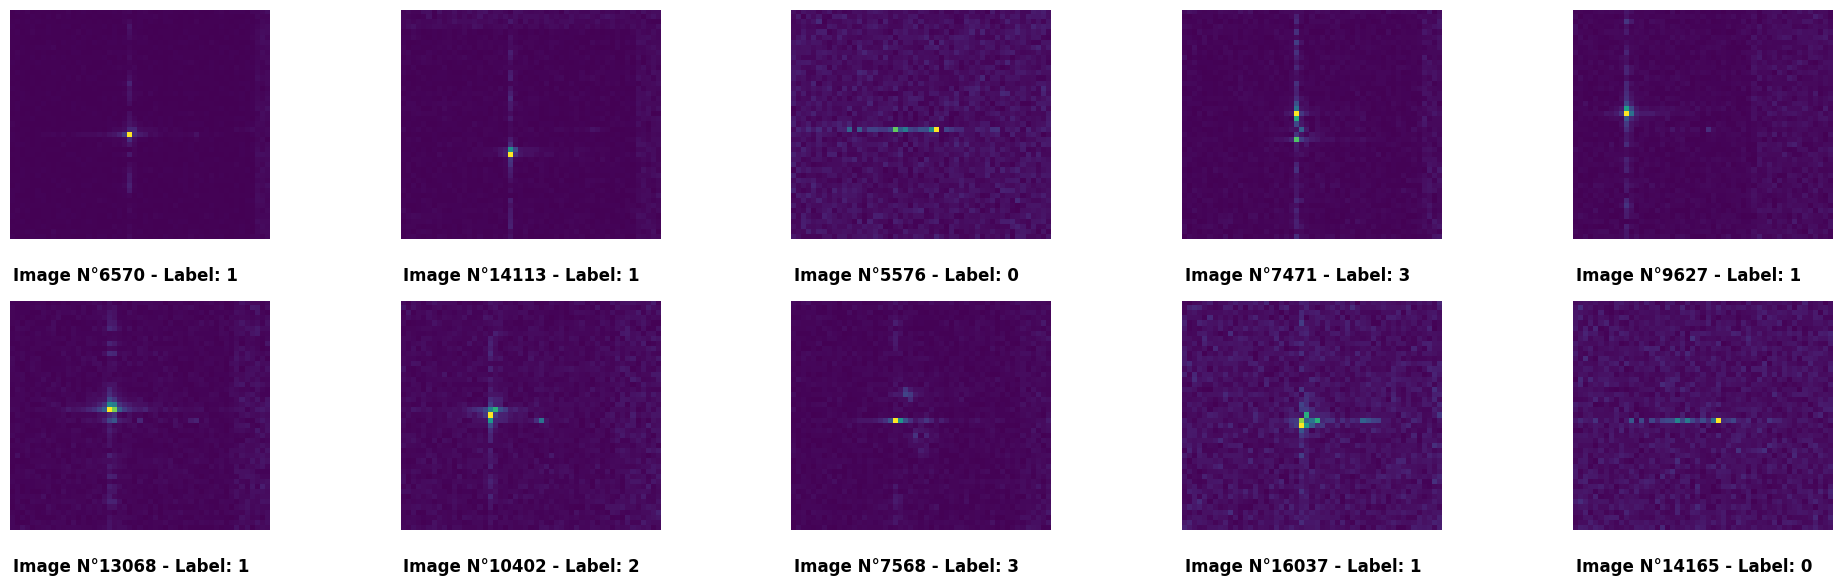

In [7]:
def load_images(folder_path):
    images = []
    for filename in sorted(os.listdir(folder_path), key=lambda x: int(x.split('_')[1].split('.')[0])):
        img_path = os.path.join(folder_path, filename)
        with Image.open(img_path) as img:
            images.append(np.array(img))
    return np.array(images)


# Load of training images
X_train = load_images('/content/drive/MyDrive/data_projet/train/train_data_unlabeled/')

# Load of training labels
df = pd.read_csv('/content/drive/MyDrive/data_projet/y_train.csv')
y_train = df['target'].values


labels = {0: "0 person", 1: "1 person", 2: "two persons", 3: "three persons"}

# Load of testing images
image_path = '/content/drive/MyDrive/data_projet/test/test_data_unlabeled/'
start_image_id = 1
end_image_id = 4796
image_size = (45, 51)

X_test = []
for image_id in range(start_image_id, end_image_id + 1):
    img = load_img(f"{image_path}/img_{image_id}.png", target_size=image_size, color_mode='rgba')
    img = img_to_array(img)
    img = img / 255.0
    X_test.append(img)

X_test = np.array(X_test)

def display_random_images(x_data, y_data, count=10):
    index = np.arange(len(x_data))
    selected_indices = np.random.choice(index, count, replace=False)

    selected_imgs = x_data[selected_indices]
    selected_labels = y_data[selected_indices]

    cols = 5
    rows = count // cols + (1 if count % cols else 0)

    plt.figure(figsize=(20, rows * 3))

    for i, (img, label) in enumerate(zip(selected_imgs, selected_labels), 1):
        plt.subplot(rows, cols, i)
        plt.imshow(img)
        # Add the image index (i.e. the number of the selected image) and the label
        # Note that `selected_indices[i-1]` is the original image index in `x_data`.
        plt.text(0, img.shape[0] + 5, f"Image N°{selected_indices[i-1]} - Label: {label}", color='black', verticalalignment='top')
        plt.axis('off')

    plt.tight_layout()
    plt.show()

display_random_images(X_train, y_train)

In [16]:
X_train_scaled = X_train.astype('float32') / 255.0

#y_train=pd.DataFrame(pd.read_csv("/content/drive/MyDrive/data_projet/y_train.csv"))
#print(y_train)
#y_train=np.asarray(y_train.drop("id", axis=1))

y_train_encoded = to_categorical(y_train, num_classes=4)

In [8]:
y_train

array([0, 1, 0, ..., 2, 0, 1])

### 1. Dataset

You can load the dataset using the following code

#### 1.2 Dataset examination

Using the following code, display random images,

#### 1.3 Dataset preprocessing

Perform the necessary data preprocessing. The best way to preprocess the data would be one hot encoding for the target variable and normalization for the input variable (using min-max or z-score normalization)

### 2. Build the model

#### 2.1 Define the model structure

In [17]:

###################################
# Write your own code here #

from keras.layers import Input
from keras.layers import Dropout

input_shape = (45, 51, 4)
model = Sequential()
#Convolutional_layer
model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=input_shape))
# Maxpooling Layer
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, kernel_size=(3, 3), activation='relu', input_shape=input_shape))
model.add(MaxPooling2D(pool_size=(2, 2)))


# Flatten Layer
model.add(Flatten())

# Dense Layer
model.add(Dense(128, activation='relu'))
model.add(Dense(4, activation='softmax'))


###################################


#### 2.2 Compile the model

In [18]:

###################################
# Write your own code here #

optimizer = Adamax(learning_rate = 0.0001)
model.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])



model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 43, 49, 32)        1184      
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 21, 24, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_5 (Conv2D)           (None, 19, 22, 64)        18496     
                                                                 
 max_pooling2d_5 (MaxPoolin  (None, 9, 11, 64)         0         
 g2D)                                                            
                                                                 
 flatten_2 (Flatten)         (None, 6336)              0         
                                                                 
 dense_4 (Dense)             (None, 128)              

### 3. Training stage

#### 3.1 Model training

In [19]:
###################################
# Write your own code here #
callback = EarlyStopping(monitor='loss', patience=3)
history = model.fit(X_train_scaled, y_train_encoded, epochs=40, batch_size=150, validation_split = 0.2)#, callbacks=[callback])


###################################

Epoch 1/40
87/87 [==============================] - 6s 23ms/step - loss: 1.3249 - accuracy: 0.3422 - val_loss: 1.3009 - val_accuracy: 0.3457
Epoch 2/40
87/87 [==============================] - 1s 17ms/step - loss: 1.2696 - accuracy: 0.4173 - val_loss: 1.2304 - val_accuracy: 0.4717
Epoch 3/40
87/87 [==============================] - 2s 18ms/step - loss: 1.1896 - accuracy: 0.4960 - val_loss: 1.1452 - val_accuracy: 0.5162
Epoch 4/40
87/87 [==============================] - 1s 17ms/step - loss: 1.1051 - accuracy: 0.5270 - val_loss: 1.0652 - val_accuracy: 0.5403
Epoch 5/40
87/87 [==============================] - 1s 13ms/step - loss: 1.0209 - accuracy: 0.5533 - val_loss: 0.9905 - val_accuracy: 0.6033
Epoch 6/40
87/87 [==============================] - 1s 13ms/step - loss: 0.9477 - accuracy: 0.6188 - val_loss: 0.9264 - val_accuracy: 0.6549
Epoch 7/40
87/87 [==============================] - 1s 13ms/step - loss: 0.8886 - accuracy: 0.6769 - val_loss: 0.8745 - val_accuracy: 0.6837
Epoch 8/40
87

#### 3.1 Model Evaluation on validation data

Plot the development of the training and validation loss, and training and validation metrics.

In [20]:
###################################
import pandas as pd

# Prédictions du modèle sur les données de test
predictions = model.predict(X_test)

# Créer un DataFrame avec les colonnes 'id' et 'target'
df_predictions = pd.DataFrame({'id': range(len(predictions)), 'target': predictions.argmax(axis=1)})

# Enregistrer le DataFrame dans un fichier CSV avec les colonnes séparées
df_predictions.to_csv('predictions.csv', index=False, columns=['id', 'target'], sep=',')




150/150 [==============================] - 1s 4ms/step


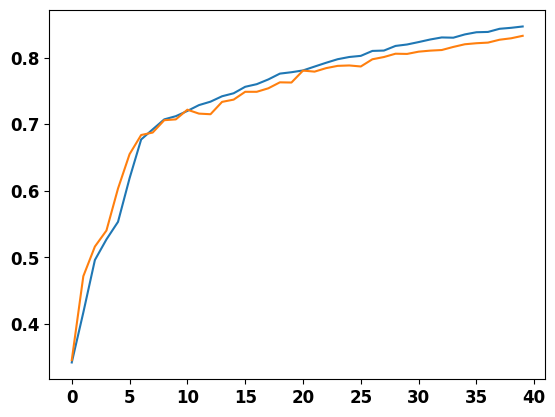

In [21]:
#Plot of accuracy and loss
plt.figure()
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])

102/102 [==============================] - 1s 11ms/step
F1 Score: 0.8564218774629042


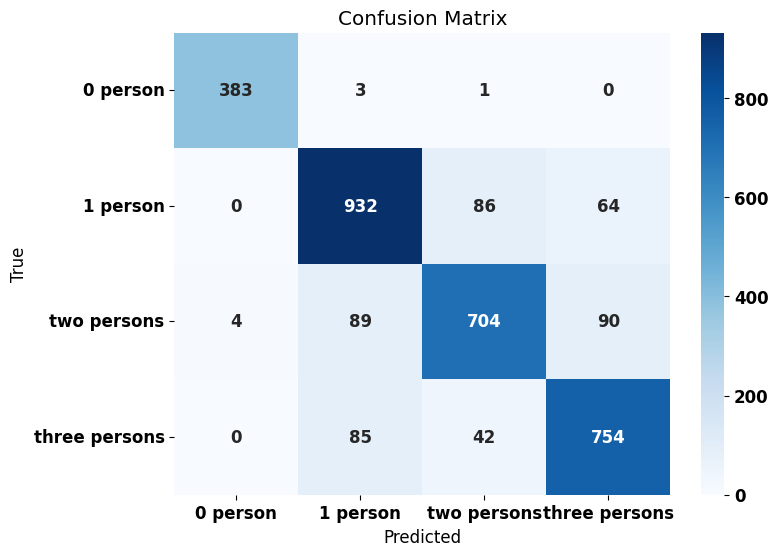

In [27]:
from sklearn.model_selection import train_test_split

# Split the labeled data into training and testing sets
X_train_split, X_test_split, y_train_split, y_test_split = train_test_split(X_train_scaled, y_train_encoded, test_size=0.2, random_state=42)

# Now, you can use X_test_split and y_test_split for evaluation
from sklearn.metrics import f1_score, confusion_matrix

# Predict the labels for the test set
predictions_split = model.predict(X_test_split)

# Convert one-hot encoded predictions to class labels
predicted_labels_split = np.argmax(predictions_split, axis=1)

# Calculate F1 score
f1_split = f1_score(np.argmax(y_test_split, axis=1), predicted_labels_split, average='weighted')
print("F1 Score:", f1_split)

# Generate confusion matrix
cm_split = confusion_matrix(np.argmax(y_test_split, axis=1), predicted_labels_split)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm_split, annot=True, fmt='d', cmap='Blues', xticklabels=labels.values(), yticklabels=labels.values())
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()
